## Malaria Parasite Detection Using CNN

Watch Full Video Here: https://youtu.be/Jdagdil0FIw


![alt text](https://ourworldindata.org/uploads/2019/04/Previous-prevalence-of-malaria-world-map.png)

Malaria is an infectious disease that causes over 400,000 deaths per year.

Mosquitoes are notorious for carrying malaria

In 2018, Rajaraman et al. published a paper entitled Pre-trained convolutional neural networks as feature extractors toward improved parasite detection in thin blood smear images.

Link: https://lhncbc.nlm.nih.gov/publication/pub9932

Paper Link: https://lhncbc.nlm.nih.gov/system/files/pub9752.pdf

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/12/dl_medical_imaging_malaria_dataset.jpg)

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27571, done.
remote: Counting objects: 100% (27571/27571), done.
remote: Compressing objects: 100% (27570/27570), done.
remote: Total 27571 (delta 1), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27571/27571), 331.64 MiB | 57.68 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (27561/27561), done.


In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [9]:
train_data_generator = datagen.flow_from_directory(directory='/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(directory='/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## CNN Model Building

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

W0906 14:12:46.659580 140276563072896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1378/1378 [==============================] - 159s 116ms/step - loss: 0.5148 - accuracy: 0.7516 - val_loss: 0.2932 - val_accuracy: 0.9198
Epoch 2/5
1378/1378 [==============================] - 157s 114ms/step - loss: 0.2424 - accuracy: 0.9248 - val_loss: 0.2023 - val_accuracy: 0.9330
Epoch 3/5
1378/1378 [==============================] - 158s 115ms/step - loss: 0.2090 - accuracy: 0.9252 - val_loss: 0.2072 - val_accuracy: 0.9350
Epoch 4/5
1378/1378 [==============================] - 158s 114ms/step - loss: 0.1879 - accuracy: 0.9415 - val_loss: 0.1777 - val_accuracy: 0.9421
Epoch 5/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.1756 - accuracy: 0.9460 - val_loss: 0.1776 - val_accuracy: 0.9359


In [16]:
history.history

{'accuracy': [0.7516328, 0.9247551, 0.92516327, 0.9414913, 0.9459815],
 'loss': [0.5148320565721985,
  0.24242815816118038,
  0.20904136766680936,
  0.18788115207257267,
  0.17563284345171232],
 'val_accuracy': [0.9197822, 0.93303084, 0.93502724, 0.94210523, 0.93593466],
 'val_loss': [0.29318461221629294,
  0.2022698652593122,
  0.20716091553154198,
  0.17766353934463383,
  0.1776162104573155]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

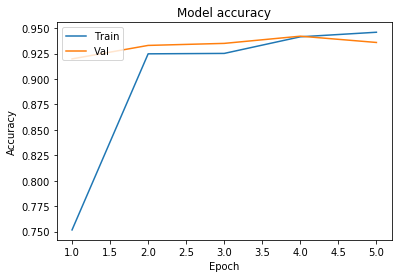

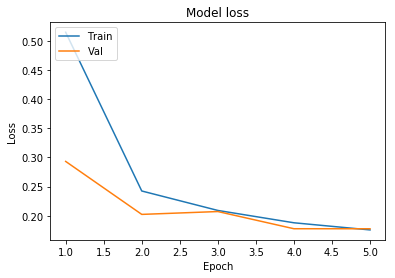

In [18]:
plot_learningCurve(history, 5)